## SF crime data analysis and modeling

### In this notebook,use Spark SQL for big data analysis on SF crime data. (https://data.sfgov.org/Public-Safety/sf-data/skgt-fej3/data).

In [3]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from ggplot import *
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [4]:
# read data from the data storage
# please upload your data into databricks community at first. 
crime_data_lines = sc.textFile('/FileStore/tables/sf_data.csv')
#prepare data 
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])

#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

#get the first line of data
display(crimes.take(3))


_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244


In [5]:
#get header
header = df_crimes.first()
header

Out[ 9 ]: 
['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

In [6]:
#get the total number of data 
print(crimes.count())

8977

### Solove  big data issues via Spark
approach 1: use RDD (not recommend)  
approach 2: use Dataframe, register the RDD to a dataframe (recommend for DE)  
approach 3: use SQL (recomend for data analysis)  
***note***: you only need to choose one of approaches as introduced above

#### We provide 3 options to transform distributed data into dataframe and SQL table, you can choose any one of them to practice

In [9]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/sf_data.csv")
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244
176182538,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,10:00,PARK,NONE,2200 Block of HAYES ST,-122.4534813455352,37.773052871338244,"(37.773052871338244, -122.4534813455352)",17618253806372
176182522,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,12:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,"(37.772540539159316, -122.46620466789287)",17618252206244
176181778,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,07/11/2017,14:43,TARAVAL,NONE,1800 Block of 10TH AV,-122.4667330308776,37.753714592060966,"(37.753714592060966, -122.4667330308776)",17618177805073
176181762,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:45,TARAVAL,NONE,17TH AV / TARAVAL ST,-122.4735538773959,37.74314326922748,"(37.74314326922748, -122.4735538773959)",17618176206244
176181665,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,20:44,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17618166506372


In [10]:

from pyspark.sql import Row

def createRow(keys, values):
  assert len(keys) == len(values)
  mapped = dict(zip(keys, values))
  return Row(**mapped)

rdd_rows = crimes.map(lambda x: createRow(header, x))

df_opt2 = spark.createDataFrame(rdd_rows)
df_opt2.createOrReplaceTempView("sf_crime")
display(df_opt2)

Address,Category,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,PdId,Resolution,Time,X,Y
SHIPLEY ST / 4TH ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176184067,"(37.7815876234701, -122.40061739890338)",SOUTHERN,17618406706244,NONE,18:15,-122.40061739890338,37.7815876234701
HAYES ST / SCOTT ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183906,"(37.775205514978545, -122.43613031282463)",PARK,17618390606244,NONE,09:45,-122.43613031282463,37.775205514978545
KIRKHAM ST / LA PLAYA ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176183423,"(37.75841171643452, -122.50910925205717)",TARAVAL,17618342306244,NONE,10:50,-122.50910925205717,37.75841171643452
100 Block of LAKE ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182776,"(37.78689526736518, -122.46095180410846)",RICHMOND,17618277606244,NONE,18:00,-122.46095180410846,37.78689526736518
POINTLOBOS AV / 48TH AV,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182754,"(37.779849075879056, -122.50943307434102)",RICHMOND,17618275406244,NONE,07:15,-122.50943307434102,37.779849075879056
2200 Block of HAYES ST,LARCENY/THEFT,07/11/2017,Tuesday,PETTY THEFT OF PROPERTY,176182538,"(37.773052871338244, -122.4534813455352)",PARK,17618253806372,NONE,10:00,-122.4534813455352,37.773052871338244
500 Block of JOHNFKENNEDY DR,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176182522,"(37.772540539159316, -122.46620466789287)",RICHMOND,17618252206244,NONE,12:00,-122.46620466789287,37.772540539159316
1800 Block of 10TH AV,BURGLARY,07/11/2017,Tuesday,"BURGLARY, UNLAWFUL ENTRY",176181778,"(37.753714592060966, -122.4667330308776)",TARAVAL,17618177805073,NONE,14:43,-122.4667330308776,37.753714592060966
17TH AV / TARAVAL ST,LARCENY/THEFT,07/11/2017,Tuesday,GRAND THEFT FROM LOCKED AUTO,176181762,"(37.74314326922748, -122.4735538773959)",TARAVAL,17618176206244,NONE,18:45,-122.4735538773959,37.74314326922748
800 Block of BRYANT ST,LARCENY/THEFT,07/11/2017,Tuesday,PETTY THEFT OF PROPERTY,176181665,"(37.775420706711, -122.40340479147905)",SOUTHERN,17618166506372,NONE,20:44,-122.40340479147905,37.775420706711


In [11]:

df_opt3 = crimes.toDF(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
display(df_opt3)
df_opt3.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244
176182538,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,10:00,PARK,NONE,2200 Block of HAYES ST,-122.4534813455352,37.773052871338244,"(37.773052871338244, -122.4534813455352)",17618253806372
176182522,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,12:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,"(37.772540539159316, -122.46620466789287)",17618252206244
176181778,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,07/11/2017,14:43,TARAVAL,NONE,1800 Block of 10TH AV,-122.4667330308776,37.753714592060966,"(37.753714592060966, -122.4667330308776)",17618177805073
176181762,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:45,TARAVAL,NONE,17TH AV / TARAVAL ST,-122.4735538773959,37.74314326922748,"(37.74314326922748, -122.4735538773959)",17618176206244
176181665,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,20:44,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17618166506372


#### Q1 question (OLAP): 
#####Write a Spark program that counts the number of crimes for different category.

Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data. You can follow this example to finish other questions.

In [13]:

catorgory_set_rdd = crimes.map(lambda item: (item[1],1))
from operator import add
result = sorted(catorgory_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])
display(result)

_1,_2
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


In [14]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


In [15]:
#Spark SQL based
crimeCategory = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,2805
OTHER OFFENSES,1002
NON-CRIMINAL,991
ASSAULT,780
VANDALISM,650
VEHICLE THEFT,353
SUSPICIOUS OCC,312
WARRANTS,312
BURGLARY,302
MISSING PERSON,265


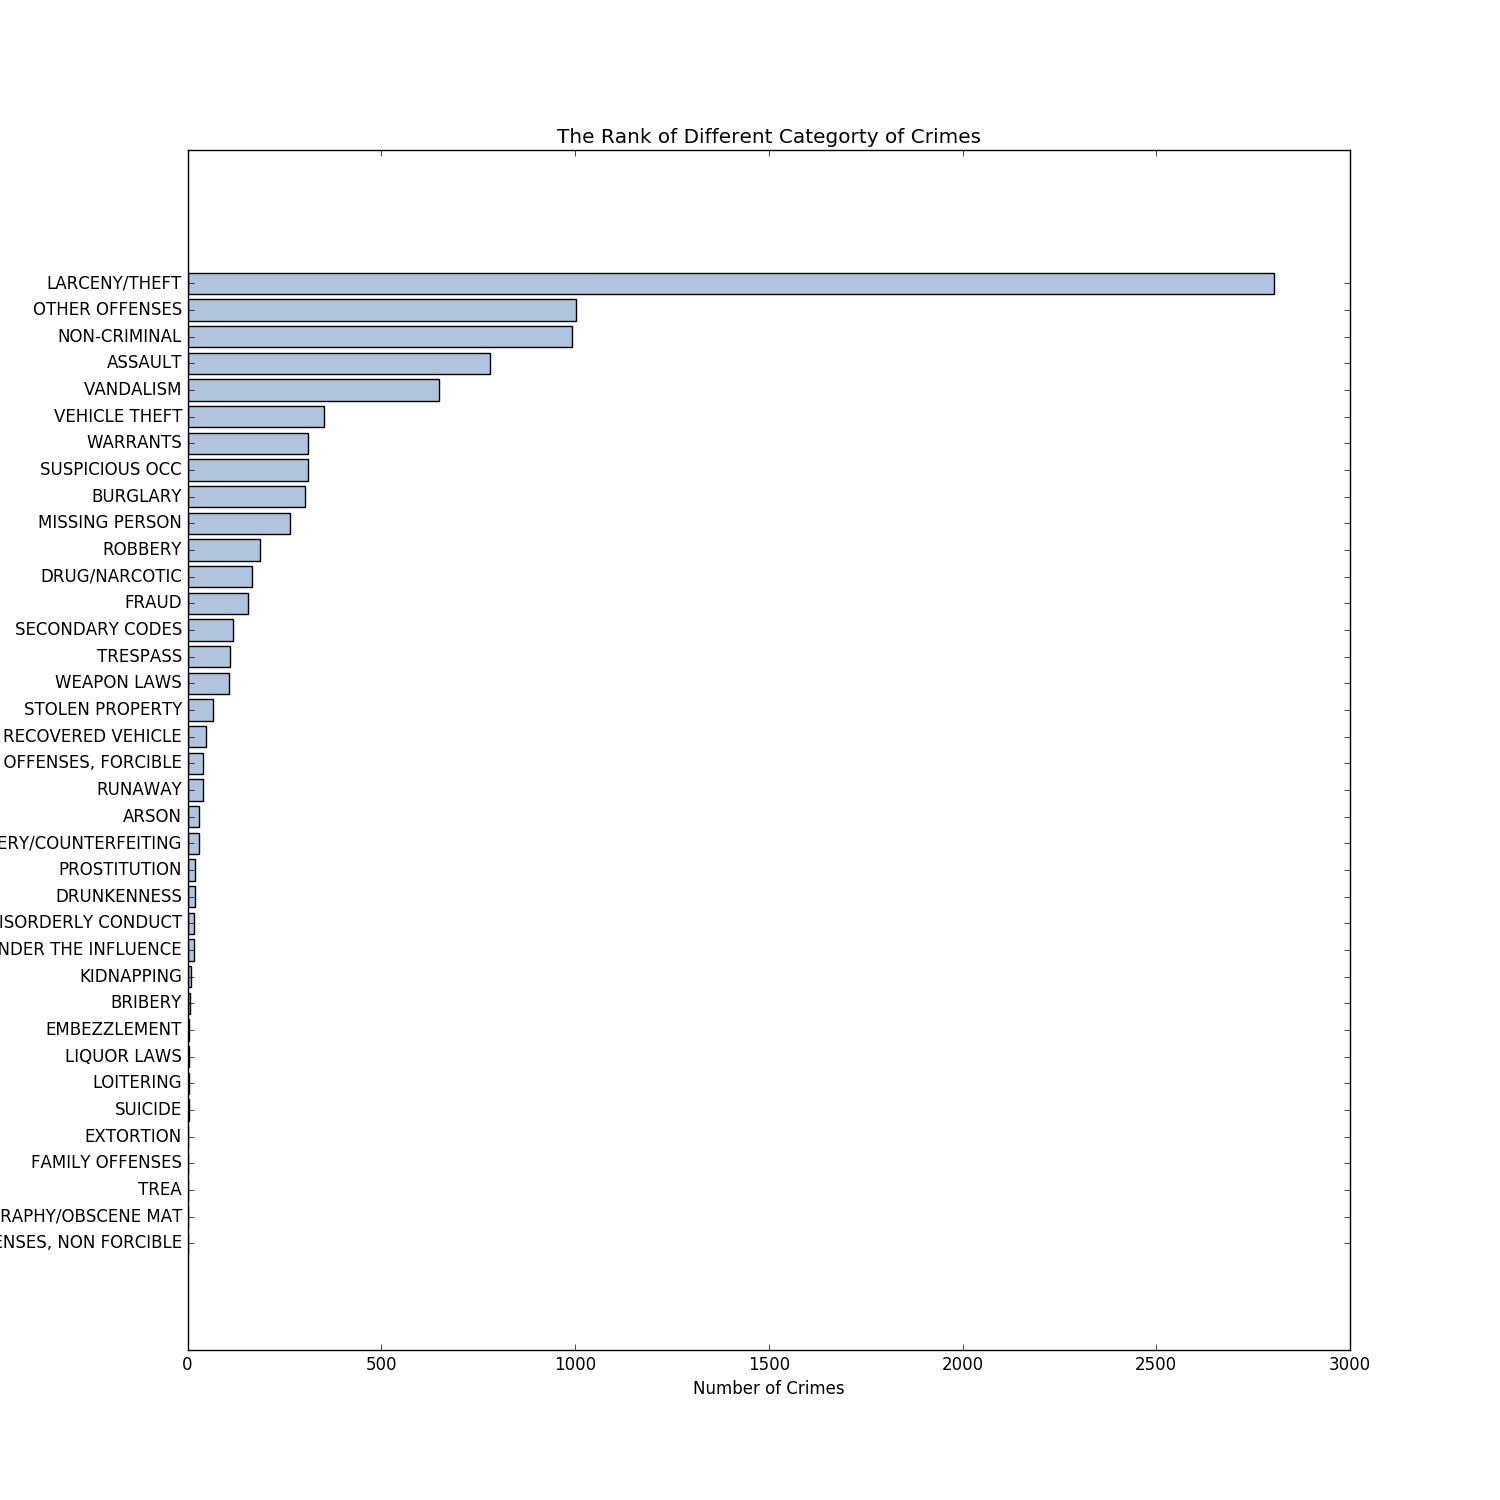

In [16]:
import matplotlib.colors as mcolors
#malplotlib reference: https://matplotlib.org/gallery/index.html
#color reference:https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py
crimes_pd_df = crimeCategory.toPandas()#not spark only dataframe

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
cate=crimes_pd_df['category']
y_pos = np.arange(len(cate))
performance = crimes_pd_df['Count']


ax.barh(y_pos, performance, align='center',
        color='lightsteelblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cate)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crimes')
ax.set_title('The Rank of Different Categorty of Crimes')

fig.set_figheight(15)
fig.set_figwidth(15)
display(fig)

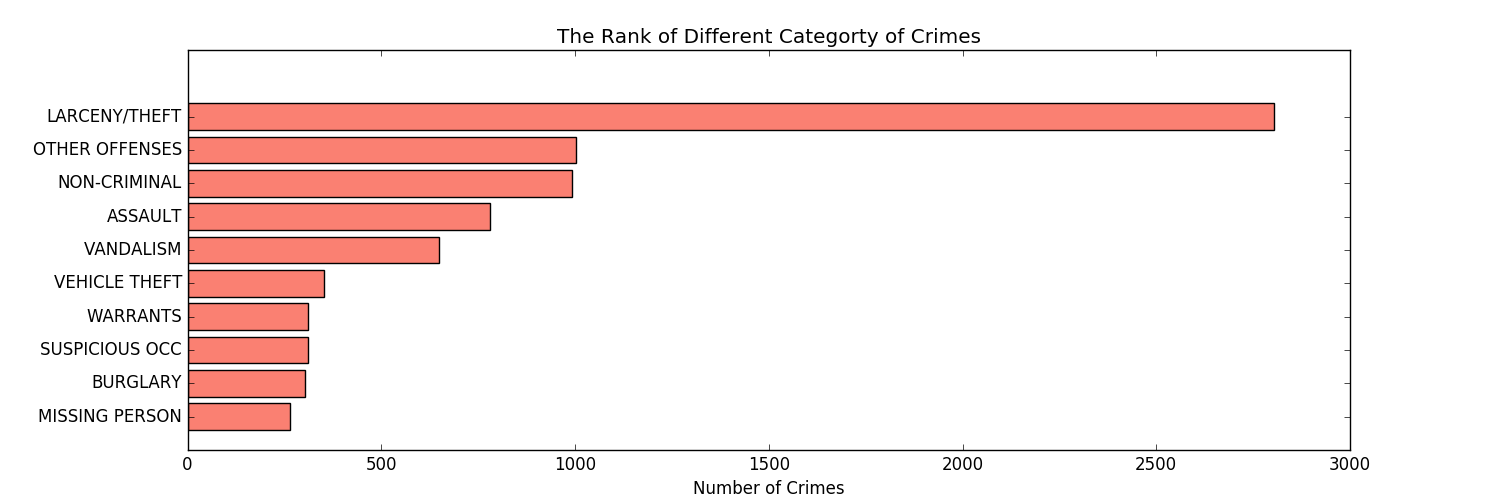

In [17]:
# Example data
plt.rcdefaults()
fig, ax = plt.subplots()
cate=crimes_pd_df['category'][0:10]
y_pos = np.arange(len(cate))
performance = crimes_pd_df['Count'][0:10]


ax.barh(y_pos, performance, align='center',
        color='salmon', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cate)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crimes')
ax.set_title('The Rank of Different Categorty of Crimes')

fig.set_figheight(5)
fig.set_figwidth(15)
display(fig)

#### (OLAP)
Counts the number of crimes for different district, and visualize your results

In [19]:
display(df_opt1)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176184067,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:15,SOUTHERN,NONE,SHIPLEY ST / 4TH ST,-122.40061739890338,37.7815876234701,"(37.7815876234701, -122.40061739890338)",17618406706244
176183906,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,09:45,PARK,NONE,HAYES ST / SCOTT ST,-122.43613031282463,37.775205514978545,"(37.775205514978545, -122.43613031282463)",17618390606244
176183423,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,10:50,TARAVAL,NONE,KIRKHAM ST / LA PLAYA ST,-122.50910925205717,37.75841171643452,"(37.75841171643452, -122.50910925205717)",17618342306244
176182776,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:00,RICHMOND,NONE,100 Block of LAKE ST,-122.46095180410846,37.78689526736518,"(37.78689526736518, -122.46095180410846)",17618277606244
176182754,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,07:15,RICHMOND,NONE,POINTLOBOS AV / 48TH AV,-122.50943307434102,37.779849075879056,"(37.779849075879056, -122.50943307434102)",17618275406244
176182538,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,10:00,PARK,NONE,2200 Block of HAYES ST,-122.4534813455352,37.773052871338244,"(37.773052871338244, -122.4534813455352)",17618253806372
176182522,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,12:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,"(37.772540539159316, -122.46620466789287)",17618252206244
176181778,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Tuesday,07/11/2017,14:43,TARAVAL,NONE,1800 Block of 10TH AV,-122.4667330308776,37.753714592060966,"(37.753714592060966, -122.4667330308776)",17618177805073
176181762,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,07/11/2017,18:45,TARAVAL,NONE,17TH AV / TARAVAL ST,-122.4735538773959,37.74314326922748,"(37.74314326922748, -122.4735538773959)",17618176206244
176181665,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Tuesday,07/11/2017,20:44,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17618166506372


In [20]:
#use spark sql to find the number of crimes of different district
crimeDistrict = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(crimeDistrict)

PdDistrict,Count
SOUTHERN,1745
MISSION,1191
NORTHERN,1173
CENTRAL,1137
BAYVIEW,817
INGLESIDE,670
TARAVAL,662
TENDERLOIN,536
RICHMOND,527
PARK,519


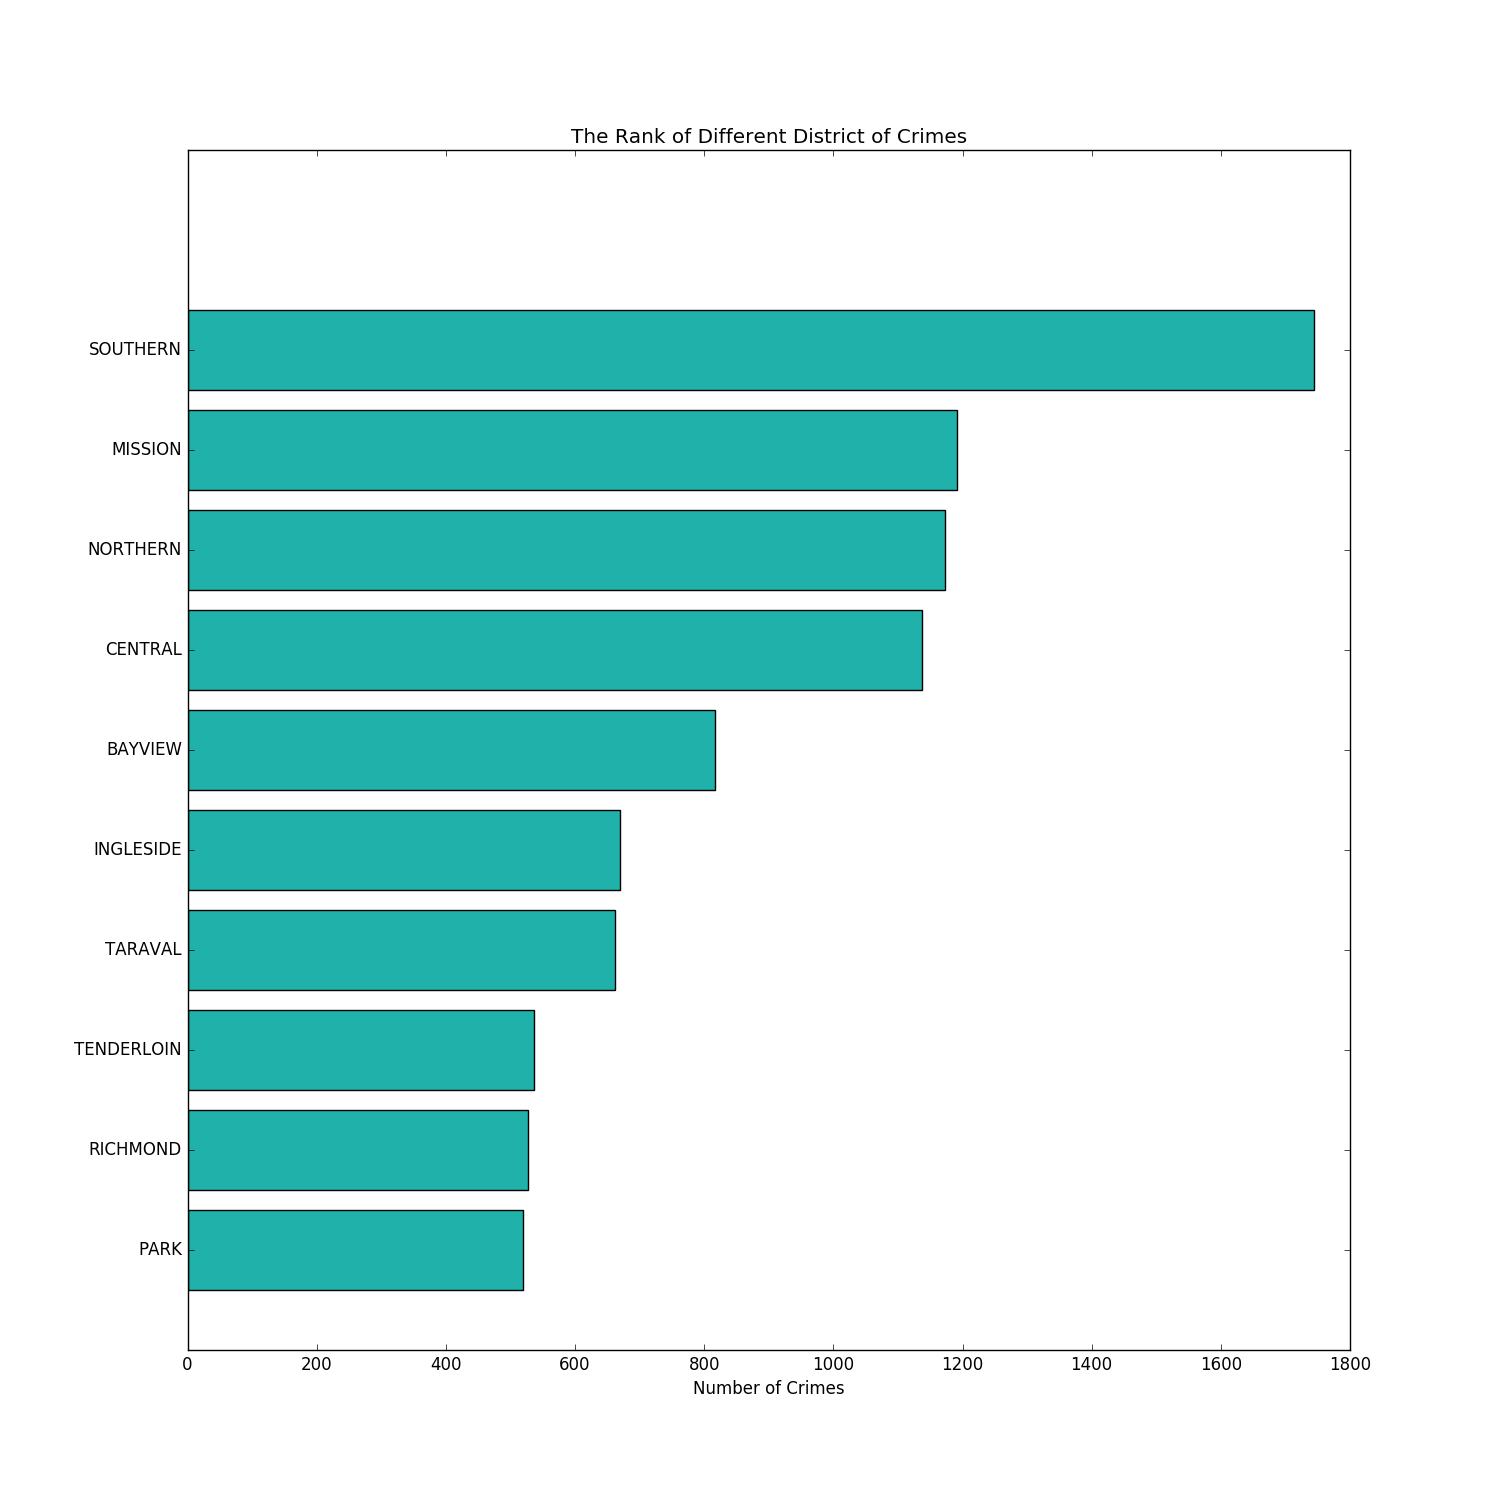

In [21]:
crimes_pd_df = crimeDistrict.toPandas()

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
cate=crimes_pd_df['PdDistrict']
y_pos = np.arange(len(cate))
performance = crimes_pd_df['Count']


ax.barh(y_pos, performance, align='center',
        color='lightseagreen', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(cate)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crimes')
ax.set_title('The Rank of Different District of Crimes')

fig.set_figheight(15)
fig.set_figwidth(15)
display(fig)

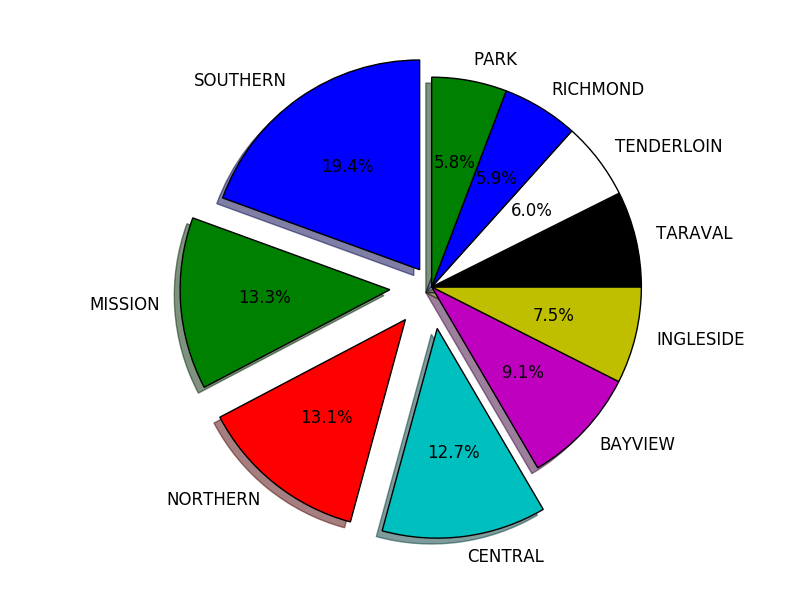

In [22]:
import matplotlib.colors as mcolors

crimes_pd_df = crimeDistrict.toPandas()
labels = crimes_pd_df['PdDistrict']
sizes = crimes_pd_df['Count']
explode = (0.1, 0.2,0.2,0.2, 0, 0, 0, 0, 0, 0)  # "explode" the 1st and 2nd slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

display(fig1)

#### (OLAP)
Count the number of crimes each "Sunday" at "SF downtown". 
hints: SF downtown is defiend  via the range of spatial location. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

In [24]:
sunday=df_opt1[df_opt1['DayOfWeek']=='Sunday']
display(sunday)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
176338907,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Sunday,07/16/2017,11:00,CENTRAL,NONE,1200 Block of COLUMBUS AV,-122.41776870991319,37.805622454052155,"(37.805622454052155, -122.41776870991319)",17633890706374
176240904,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,07/16/2017,23:00,INGLESIDE,NONE,200 Block of JUANITA WY,-122.45635020942382,37.740791022501575,"(37.740791022501575, -122.45635020942382)",17624090406244
176222695,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,07/16/2017,11:30,NORTHERN,NONE,BUCHANAN ST / GREEN ST,-122.43201771436009,37.79657533701716,"(37.79657533701716, -122.43201771436009)",17622269506244
176207556,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,07/16/2017,22:30,BAYVIEW,NONE,NEWHALL ST / BAYVIEW ST,-122.3946792639964,37.732920066286304,"(37.732920066286304, -122.3946792639964)",17620755628150
176207368,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Sunday,07/16/2017,23:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17620736828150
176207352,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,07/16/2017,20:45,BAYVIEW,NONE,0 Block of DORMAN AV,-122.40286263172298,37.73961926700241,"(37.73961926700241, -122.40286263172298)",17620735206244
176205049,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,07/16/2017,10:18,SOUTHERN,NONE,VANNESS AV / MARKET ST,-122.41925789481357,37.77514629165388,"(37.77514629165388, -122.41925789481357)",17620504906244
176199668,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,07/16/2017,02:09,SOUTHERN,NONE,800 Block of BRYANT ST,-122.40340479147905,37.775420706711,"(37.775420706711, -122.40340479147905)",17619966806244
170584982,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,07/16/2017,01:00,CENTRAL,UNFOUNDED,CALIFORNIA ST / MASON ST,-122.41082093944749,37.791833459723215,"(37.791833459723215, -122.41082093944749)",17058498207021
170584910,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Sunday,07/16/2017,08:45,PARK,NONE,900 Block of CORBETT AV,-122.44379705572366,37.75250710452812,"(37.75250710452812, -122.44379705572366)",17058491005073


In [25]:
# 'DayOfWeek', 'Location', '(37.730882540859845, -122.42614570548649)'
# west_north_corner = 37.798776, -122.407573
# west_south_corner = 37.786555, -122.407134
# east_north_corner = 37.799365, -122.394032
# east_south_corner = 37.786964, -122.394906

from pyspark.sql.functions import udf
from pyspark.sql.types import BooleanType
#udf reference: https://changhsinlee.com/pyspark-udf/
def isSFDowntown(location):
  lat, long = [float(x.strip()) for x in location.strip()[1:-1].split(',')]#strip remove characters from both left and right based 
  lat_range  = [37.786555, 37.799365]
  long_range = [-122.407573, -122.394032]
  if lat_range[0] < lat < lat_range[1] and long_range[0] < long < long_range[1]:
    return True
  return False

downtown = udf(isSFDowntown, BooleanType())
sunday_downtown= sunday.filter(downtown(df_opt1.Location))
display(sunday_downtown)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
170583376,NON-CRIMINAL,LOST PROPERTY,Sunday,07/16/2017,12:00,SOUTHERN,NONE,MARKET ST / NEWMONTGOMERY ST,-122.40207024322743,37.78871986881325,"(37.78871986881325, -122.40207024322743)",17058337671000
170583229,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,07/16/2017,20:35,SOUTHERN,NONE,200 Block of FREMONT ST,-122.39468822966062,37.78894376450843,"(37.78894376450843, -122.39468822966062)",17058322906224
170581085,WARRANTS,WARRANT ARREST,Sunday,07/16/2017,12:00,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.4074418942072,37.7984735976057,"(37.7984735976057, -122.4074418942072)",17058108563010
170581085,KIDNAPPING,"KIDNAPPING, ADULT VICTIM",Sunday,07/16/2017,12:00,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.4074418942072,37.7984735976057,"(37.7984735976057, -122.4074418942072)",17058108526141
170581085,ASSAULT,ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEMENT OR THEFT),Sunday,07/16/2017,12:00,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.4074418942072,37.7984735976057,"(37.7984735976057, -122.4074418942072)",17058108515041
170581085,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,07/16/2017,12:00,CENTRAL,"ARREST, BOOKED",300 Block of COLUMBUS AV,-122.4074418942072,37.7984735976057,"(37.7984735976057, -122.4074418942072)",17058108504014
170580269,BURGLARY,"BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY",Sunday,07/16/2017,18:00,CENTRAL,NONE,400 Block of DAVIS CT,-122.39832439284213,37.79669767383336,"(37.79669767383336, -122.39832439284213)",17058026905013
170578822,LARCENY/THEFT,GRAND THEFT FROM PERSON,Sunday,07/16/2017,20:28,TENDERLOIN,NONE,100 Block of OFARRELL ST,-122.4072440870319,37.78656476076854,"(37.78656476076854, -122.4072440870319)",17057882206153
170578565,NON-CRIMINAL,FOUND PROPERTY,Sunday,07/16/2017,11:59,CENTRAL,NONE,100 Block of PINE ST,-122.39919787989624,37.792385871141335,"(37.792385871141335, -122.39919787989624)",17057856572000
170578565,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,07/16/2017,11:59,CENTRAL,NONE,100 Block of PINE ST,-122.39919787989624,37.792385871141335,"(37.792385871141335, -122.39919787989624)",17057856506244


In [26]:
# the number of crimes in sunday
sunday_crime=sunday_downtown.count()
total_crime=df_opt1.count()
print('The number of crime in sunday is ',sunday_crime,'out of total crime ',total_crime)

The number of crime in sunday is 96 out of total crime 8977

#### (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [28]:
df_opt2 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018__1_-c56f0.csv")
display(df_opt2)
df_opt1.createOrReplaceTempView("total_df")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362


In [29]:
df_opt2.count()

Out[ 130 ]: 2215024

In [30]:
from pyspark.sql.types import DateType
from pyspark.sql.functions import year,month,dayofmonth,to_date


#reference: https://www.obstkel.com/blog/spark-sql-date-functions
#add columns in spark.sql is df.withColumn("colName",column col)
df=df_opt2.withColumn('Month',month(to_date(df_opt2.Date,'MM/dd/yyyy')))
df=df.withColumn('Year',year(to_date(df.Date,'MM/dd/yyyy')))
df=df.withColumn('Day',dayofmonth(to_date(df.Date,'MM/dd/yyyy')))
display(df)
df.createOrReplaceTempView("df")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year,Day
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000,1,2015,19
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074,2,2015,1
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014,2,2015,1
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200,2,2015,1
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160,1,2015,27
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041,2,2015,1
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200,1,2015,31
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150,1,2015,31
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053,1,2015,31
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362,1,2015,31


In [31]:
#use sql to group by the number of crime 
table=spark.sql("SELECT Month,Year,count(*) as Count FROM df WHERE Year=2015 OR Year=2016 OR Year=2017 OR Year=2018 GROUP BY Month, Year ORDER BY Year, Month ")
display(table)

Month,Year,Count
1,2015,13606
2,2015,12329
3,2015,13929
4,2015,12959
5,2015,13729
6,2015,13304
7,2015,13365
8,2015,13730
9,2015,12896
10,2015,13147


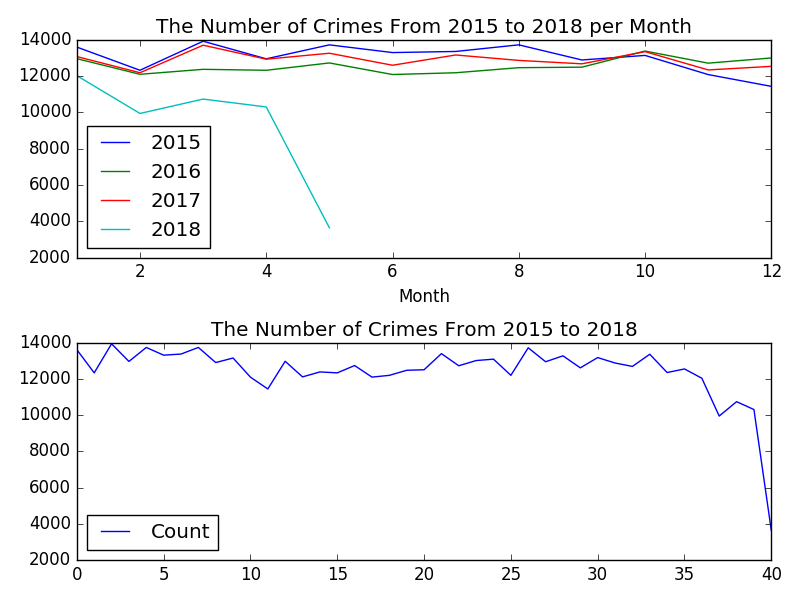

In [32]:
table_pd=table.toPandas()
fig, ax = plt.subplots(2,1)
for label, grp in table_pd.groupby('Year'):
    grp.plot(x = 'Month', y = 'Count',ax = ax[0], label = label)
table_pd.plot(y='Count',ax=ax[1])
ax[0].set_title('The Number of Crimes From 2015 to 2018 per Month')
ax[1].set_title('The Number of Crimes From 2015 to 2018')
fig.tight_layout()  

display(fig)

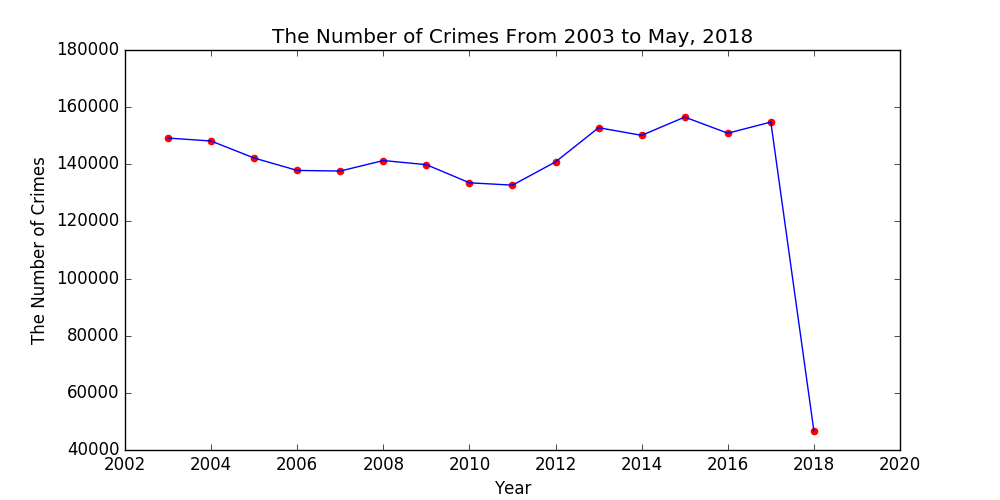

In [33]:
df_crimes_2003_to_2018_yearly = df.groupBy('Year').count().orderBy('count', ascending=False)
df_crimes_2003_to_2018_yearly.cache()

df_crimes_yearly = df_crimes_2003_to_2018_yearly.toPandas()
year = list(df_crimes_yearly['Year'])
year_crime_count = list(df_crimes_yearly['count'])
year_count_pairs = [(y, c) for y, c in zip(year, year_crime_count)]
year_count_pairs.sort()

year = [y for y, _ in year_count_pairs]
year_crime_count = [c for _, c in year_count_pairs]

fig, ax = plt.subplots()
ax.plot(year, year_crime_count, color='blue')
ax.scatter(year, year_crime_count, color='red')
ax.set_xlabel('Year')
ax.set_ylabel('The Number of Crimes')
ax.set_title('The Number of Crimes From 2003 to May, 2018')

fig.set_figheight(5)
fig.set_figwidth(10)
display(fig)

#### (OLAP)
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15, 2018/10/15. Then, give your travel suggestion to visit SF.

In [35]:
display(df)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year,Day
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000,1,2015,19
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074,2,2015,1
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014,2,2015,1
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200,2,2015,1
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160,1,2015,27
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041,2,2015,1
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200,1,2015,31
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150,1,2015,31
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053,1,2015,31
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362,1,2015,31


In [36]:
Crime_by_hour = spark.sql("SELECT Date,hour(time) AS hours,count(*) AS Count FROM df WHERE Date='01/27/2015' OR Date='01/27/2016' OR Date='01/27/2017' OR Date='01/27/2018' GROUP BY Date,hours ORDER BY Date,hours")
display(Crime_by_hour)

Date,hours,Count
01/27/2015,0,16
01/27/2015,1,10
01/27/2015,2,9
01/27/2015,3,6
01/27/2015,4,5
01/27/2015,5,7
01/27/2015,6,5
01/27/2015,7,9
01/27/2015,8,14
01/27/2015,9,30


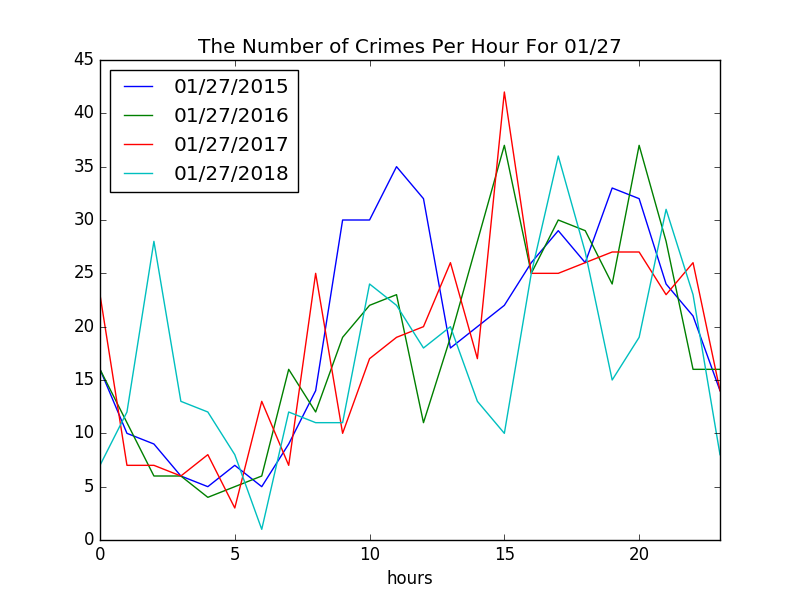

In [37]:
Crime_by_hour=Crime_by_hour.toPandas()
fig, ax = plt.subplots()
for label, grp in Crime_by_hour.groupby('Date'):
    grp.plot(x = 'hours', y = 'Count',ax =ax, label = label)
ax.set_title('The Number of Crimes Per Hour For 01/27')
display(fig)

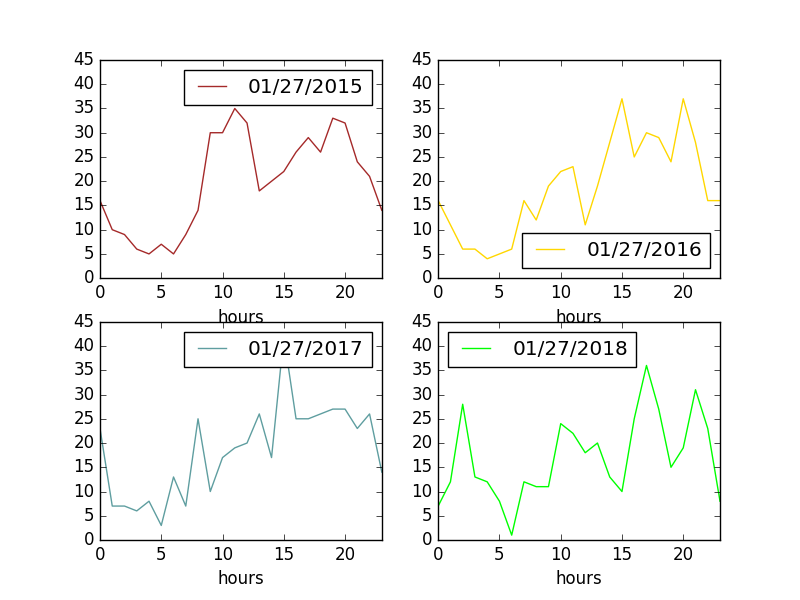

In [38]:
fig, ax = plt.subplots(2,2)
Crime_by_hour[Crime_by_hour['Date']=='01/27/2015'].plot(x = 'hours', y = 'Count',ax =ax[0,0],label='01/27/2015',color='brown')
ax[0,0].set_ylim([0, 45])
Crime_by_hour[Crime_by_hour['Date']=='01/27/2016'].plot(x = 'hours', y = 'Count',ax =ax[0,1],label='01/27/2016',color='gold')
ax[0,1].set_ylim([0, 45])
Crime_by_hour[Crime_by_hour['Date']=='01/27/2017'].plot(x = 'hours', y = 'Count',ax =ax[1,0],label='01/27/2017',color='cadetblue')
ax[1,0].set_ylim([0, 45])
Crime_by_hour[Crime_by_hour['Date']=='01/27/2018'].plot(x = 'hours', y = 'Count',ax =ax[1,1],label='01/27/2018',color='lime')
ax[1,1].set_ylim([0, 45])
display(fig)

#### (OLAP)
(1) Step1: Find out the top-3 danger disrict  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [40]:
df_crimes_district = df_opt1.groupBy('PdDistrict').count().orderBy('count', ascending=False)
display(df_crimes_district)

PdDistrict,count
SOUTHERN,1745
MISSION,1191
NORTHERN,1173
CENTRAL,1137
BAYVIEW,817
INGLESIDE,670
TARAVAL,662
TENDERLOIN,536
RICHMOND,527
PARK,519


In [41]:
display(df)

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year,Day
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000,1,2015,19
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074,2,2015,1
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014,2,2015,1
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200,2,2015,1
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160,1,2015,27
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041,2,2015,1
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200,1,2015,31
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150,1,2015,31
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053,1,2015,31
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362,1,2015,31


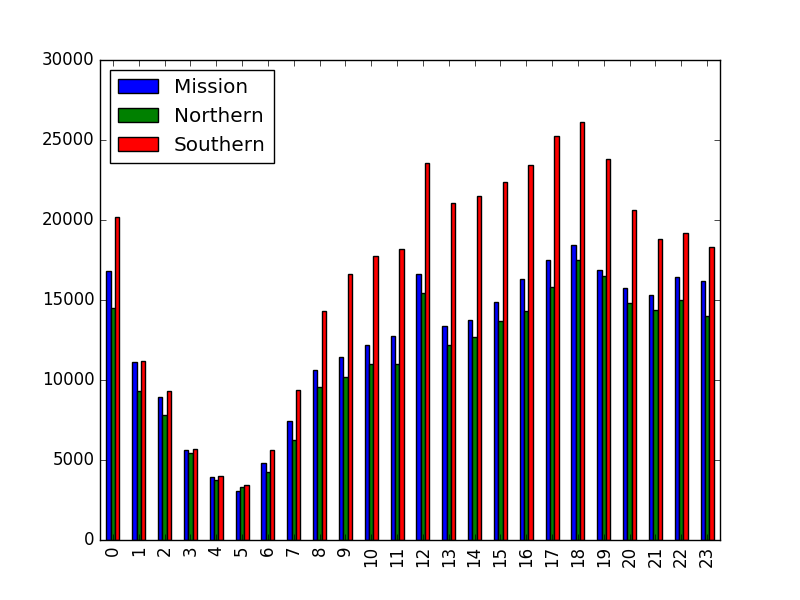

In [42]:
S_by_hour = spark.sql("select count(*) as count from df where PdDistrict='SOUTHERN' group by hour(time) order by hour(time)")
M_by_hour = spark.sql("select count(*) as count from df where PdDistrict='MISSION' group by hour(time) order by hour(time)")
N_by_hour = spark.sql("select count(*) as count from df where PdDistrict='NORTHERN' group by hour(time) order by hour(time)")

df = pd.DataFrame({'Southern': S_by_hour.toPandas().as_matrix().flatten(),'Mission': M_by_hour.toPandas().as_matrix().flatten(),'Northern': N_by_hour.toPandas().as_matrix().flatten()}, index = list(range(24)) )
fig, ax = plt.subplots()
ax = df.plot.bar()
fig.set_figheight(15)
fig.set_figwidth(15)
display()

#### For different category of crime, find the percentage of resulition. Based on the output, give your hints to adjust the policy.

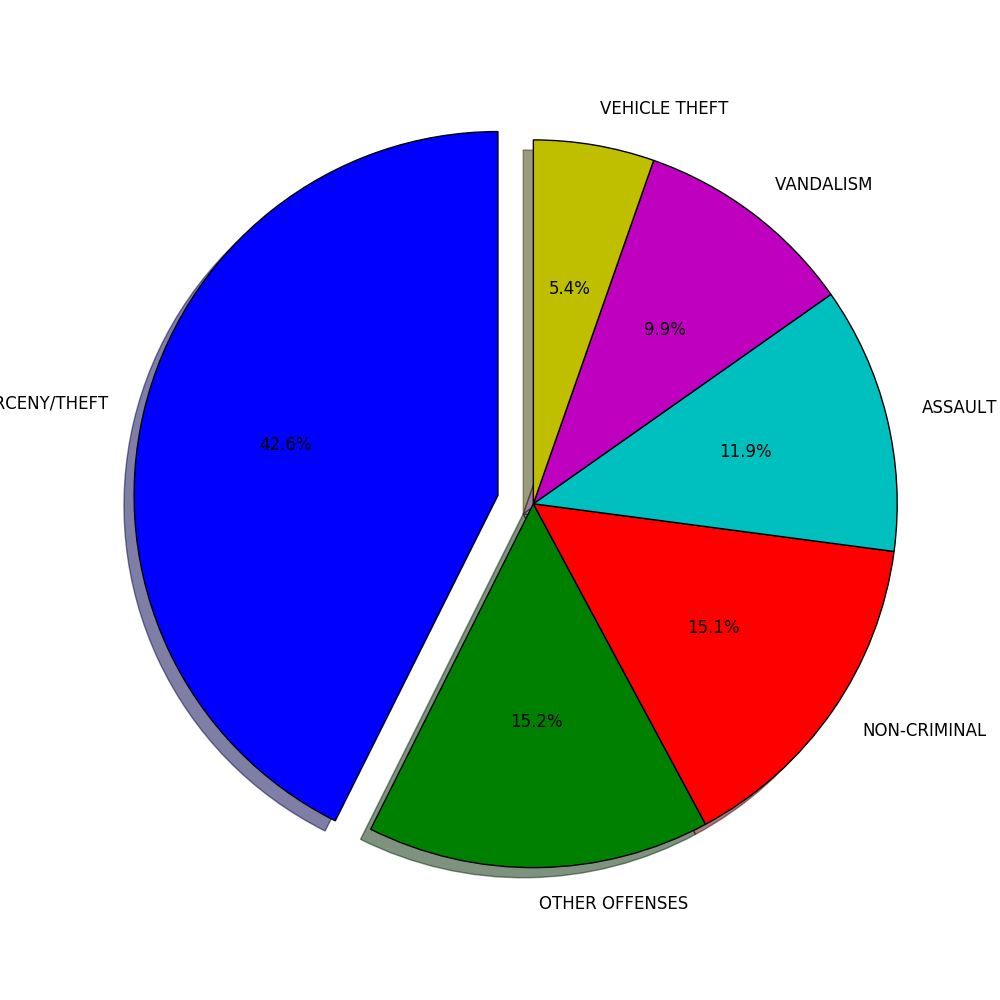

In [44]:
crimeCategory = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
crimes_pd_df=crimeCategory.toPandas()
crime_category = crimes_pd_df['category'][:6]
crime_count = crimes_pd_df['Count'][:6]

fig1, ax1 = plt.subplots()
explode = [0.1, 0, 0, 0, 0, 0]
ax1.pie(crime_count, explode=explode, labels=crime_category, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.set_figheight(10)
fig1.set_figwidth(10)
display(fig1)

#### visualize the spatial distribution of crimes and run a kmeans clustering algorithm (please use Spark ML kmeans)  
Reference https://spark.apache.org/docs/latest/ml-clustering.html#k-means

In [46]:
# make a scatter plot to show the spatial distribution of incidents
locationx =spark.sql("select X from df").toPandas()
locationy =spark.sql("select Y from df").toPandas()



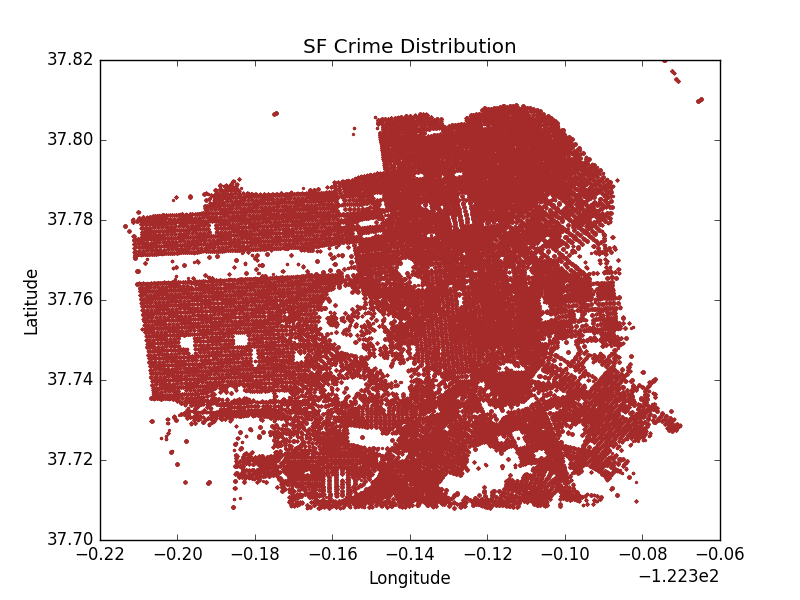

In [47]:
x = locationx.as_matrix().flatten()
y = locationy.as_matrix().flatten()
x = [float(_) for _ in x]
y = [float(_) for _ in y]
fig = plt.figure()
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(37.70,37.82)
plt.xlim(-122.52,-122.36)
plt.scatter(x,y, s = 2, color = 'brown')
plt.show()
display()

In [48]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator



df_coor = spark.sql("select CAST(X AS DECIMAL(8,5)) as X, CAST(Y AS DECIMAL(8,5)) as Y  from df")[['X','Y']]
vecAssembler = VectorAssembler(inputCols=["X", "Y"], outputCol="features")
new_df = vecAssembler.transform(df_coor)[['features']]


In [49]:
# Trains a k-means model.
kmeans = KMeans().setK(5).setSeed(1)
model = kmeans.fit(new_df)

# Shows the result.
centers = model.clusterCenters()
#print("Cluster Centers: ")
#for center in centers:
#    print(center)

In [50]:
#Make predictions
predictions = model.transform(new_df)
#Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))


Silhouette with squared euclidean distance = 0.5886552961594719

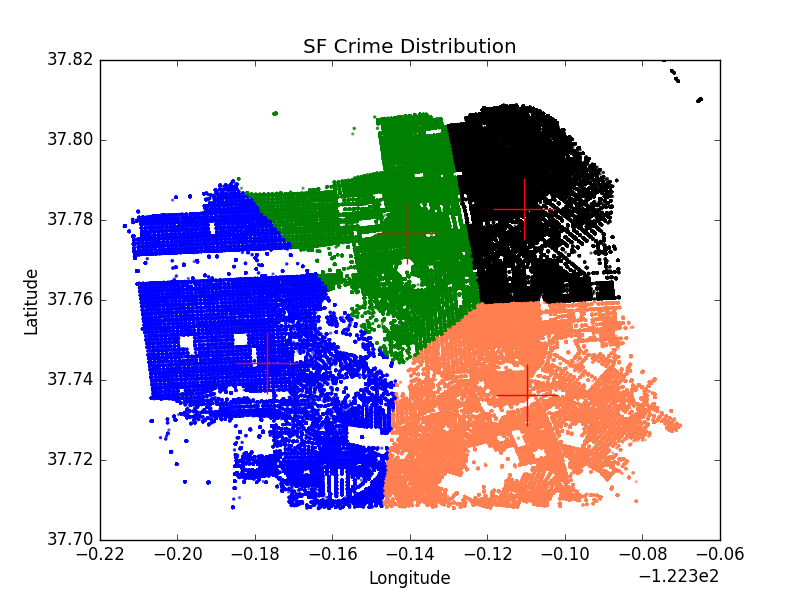

In [51]:
# cluster centers
long_centers = [i for i, _ in centers]
lat_centers = [i for _, i in centers]

# assign colors for each data points based on their memberships
memberships = predictions.toPandas().loc[:,'prediction'].values
clusters5colors = {0: 'green', 1: 'yellow', 2: 'blue',3:'black',4:'coral',5:'pink'}
colors = [clusters5colors[i] for i in memberships]

fig = plt.figure()
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(x,y, s = 2, color=colors,alpha=0.5)
plt.scatter(long_centers, lat_centers, s = 2000, color = 'red', marker = '+')
plt.ylim(37.70,37.82)
plt.xlim(-122.52,-122.36)
plt.show()
display()